In [1]:
#Dataset: banknotes.csv

### Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [3]:
df = pd.read_csv('banknotes.csv')

In [4]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
df.shape #4features

(1372, 5)

### Seperate the input and output data

In [8]:
x = df.drop('Class', axis = 1)
y = df['Class']

### Explore the data

In [10]:
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")

C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


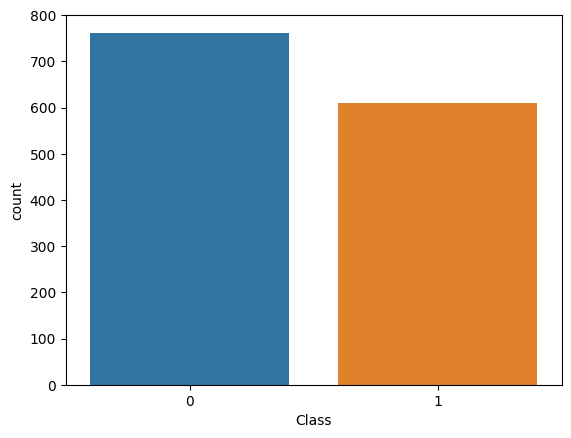

In [12]:
sns.countplot(x = y);

In [13]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

In [15]:
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")

C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

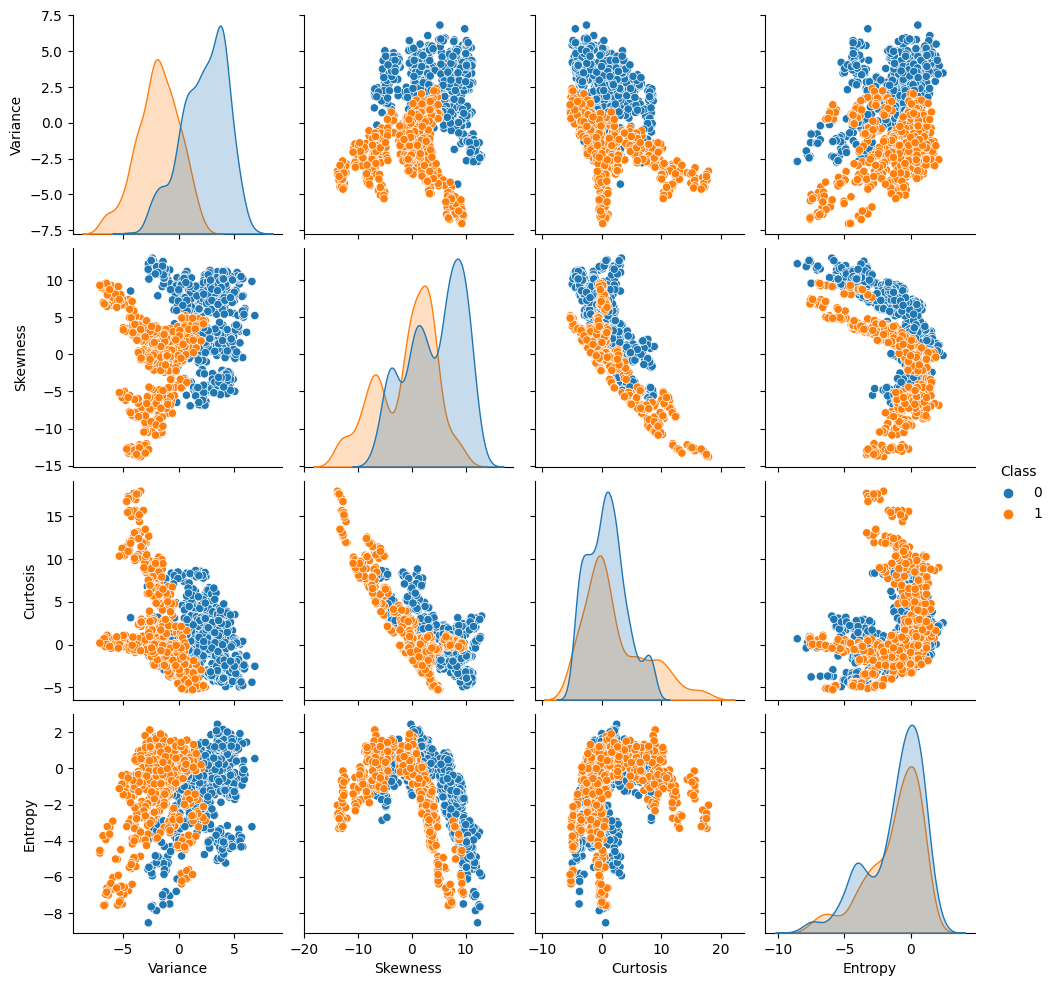

In [18]:
sns.pairplot(df, hue='Class');

### Cross Validation

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, stratify = y)

In [28]:
x_train.shape

(1029, 4)

In [29]:
x_test.shape

(343, 4)

In [30]:
y.value_counts()[0]/len(y) *100

55.539358600583085

In [33]:
y_test.value_counts()[0]/len(y_test) *100, y_test.value_counts()[1]/len(y_test)*100

(56.85131195335277, 43.14868804664723)

### Desicion Tree Model

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
classifier = DecisionTreeClassifier(random_state = 0)

In [41]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Plot the tree

In [42]:
from sklearn.tree import plot_tree

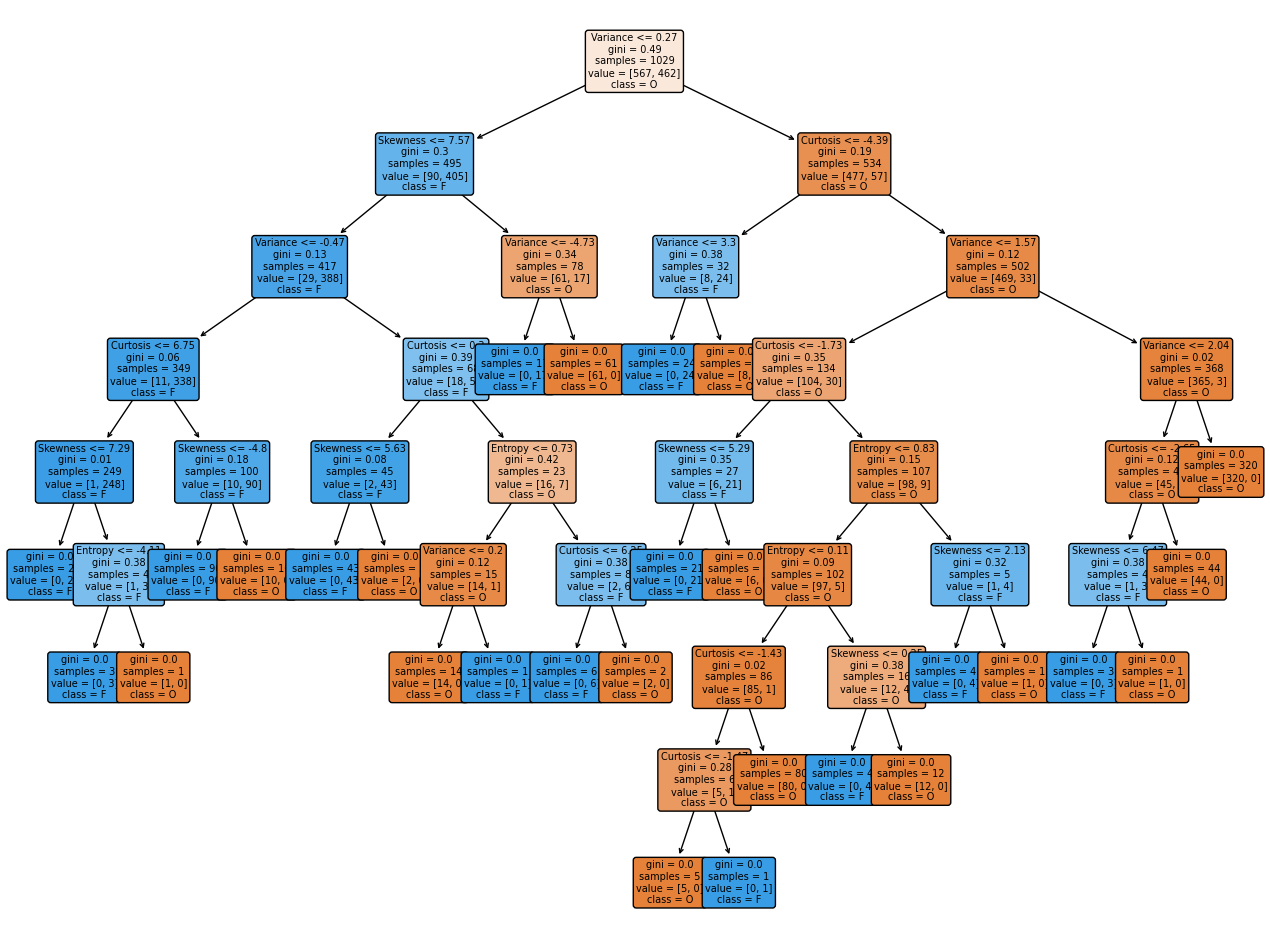

In [46]:
plt.figure(figsize = (16, 12))
plot_tree(classifier, fontsize=7, filled=True, class_names=['O', 'F'],feature_names = x.columns, precision=2, rounded = True);

## performance Evalution

In [48]:
y_pred = classifier.predict(x_test)

In [49]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

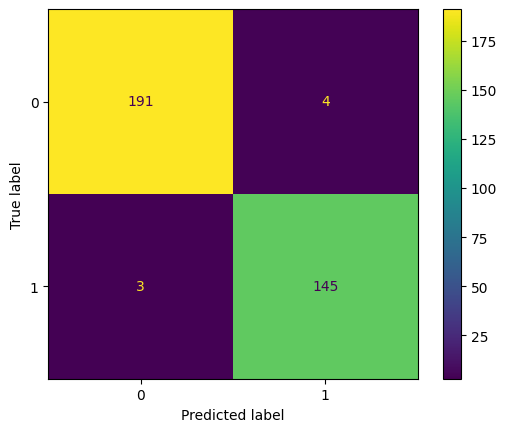

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [52]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [53]:
335/343

0.9766763848396501

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [55]:
classifier.feature_importances_

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

In [56]:
imp = classifier.feature_importances_

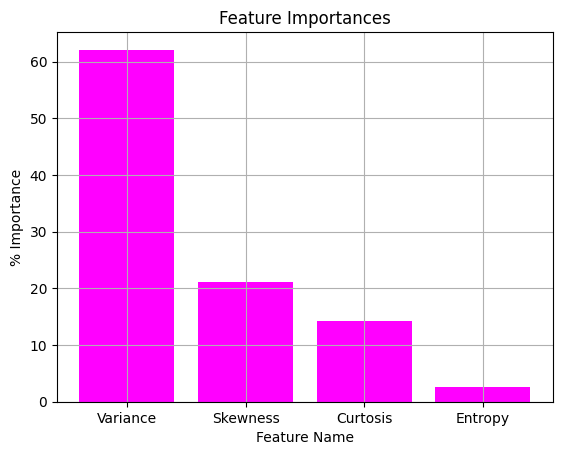

In [58]:
plt.title('Feature Importances')
plt.grid()
plt.xlabel('Feature Name')
plt.ylabel('% Importance')
plt.bar(x.columns, imp*100, color = 'magenta');

In [59]:
new = pd.DataFrame({
    'Variance' : [3.86600, -3.75030, 0.32924],
    'Skewness' : [-2.63830, -13.45860, -4.45520],
    'Curtosis' :[1.9242, 17.5932, 4.5718],
    'Entropy':[0.10645, -2.77710, -0.98880]
})
new

,Variance,Skewness,Curtosis,Entropy
0,3.86600,-2.6383,1.9242,0.10645
1,-3.75030,-13.4586,17.5932,-2.77710
2,0.32924,-4.4552,4.5718,-0.98880


In [60]:
classifier.predict(new)

array([0, 1, 0], dtype=int64)

In [ ]:
##